In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import util

In [3]:
x0,xf = util.paper_setup_5_quads()

In [4]:
x0.T

array([[ 0.5,  1.5,  1. ,  0. ,  0. ,  0. ,  2.5,  1.5,  1. ,  0. ,  0. ,
         0. ,  1.5,  1.3,  1. ,  0. ,  0. ,  0. , -0.5,  0.5,  1. ,  0. ,
         0. ,  0. ,  1.1,  1.1,  1. ,  0. ,  0. ,  0. ]])

In [5]:
xf.T

array([[ 2.5,  1.5,  1. ,  0. ,  0. ,  0. ,  0.5,  1.5,  1. ,  0. ,  0. ,
         0. ,  1.5,  2.2,  1. ,  0. ,  0. ,  0. , -0.5,  1.5,  1. ,  0. ,
         0. ,  0. , -1.1,  1.1,  1. ,  0. ,  0. ,  0. ]])

In [7]:
def set_bounds(xydata, ax=None, zoom=0.1):
    """Set the axis on plt.gca() by some margin beyond the data, default 10% margin

    Reference:
    https://github.com/zjwilliams20/pocketknives/blob/main/pocketknives/python/graphics.py

    """

    xydata = np.atleast_2d(xydata)

    if not ax:
        ax = plt.gca()

    xmarg = xydata[:, 0].ptp() * zoom
    ymarg = xydata[:, 1].ptp() * zoom
    ax.set(
        xlim=(xydata[:, 0].min() - xmarg, xydata[:, 0].max() + xmarg),
        ylim=(xydata[:, 1].min() - ymarg, xydata[:, 1].max() + ymarg),
    )

In [30]:
trajs = [
    (
        np.array(
            [[0.5, 1.5, 1, 0, 0, 0,
                    2.5, 1.5, 1, 0, 0, 0,
                    1.5, 1.3, 1, 0, 0, 0,
                    -0.5 ,0.5, 1, 0, 0, 0,
                   1.1, 1.1, 1, 0, 0, 0]]
                ),
        np.array(
            [
               [[2.5, 1.5, 1, 0, 0, 0, 
                    0.5, 1.5, 1, 0, 0, 0, 
                    1.5, 2.2, 1, 0, 0, 0,
                   -0.5, 1.5, 1, 0, 0, 0,
               -1.1, 1.1, 1, 0, 0, 0]]
            ]
        ),
    ),
    
]

In [39]:
for i, (x0, xf) in enumerate(trajs[0: 1]):
    print(i,x0,xf)

0 [[ 0.5  1.5  1.   0.   0.   0.   2.5  1.5  1.   0.   0.   0.   1.5  1.3
   1.   0.   0.   0.  -0.5  0.5  1.   0.   0.   0.   1.1  1.1  1.   0.
   0.   0. ]] [[[ 2.5  1.5  1.   0.   0.   0.   0.5  1.5  1.   0.   0.   0.   1.5  2.2
    1.   0.   0.   0.  -0.5  1.5  1.   0.   0.   0.  -1.1  1.1  1.   0.
    0.   0. ]]]


In [40]:
def render_trials():

    fig = plt.figure()
    plt.style.use("dark_background")

    # n_agents, n_states = trajs[0].shape
    n_agents = 5
    n_states = 6

   
    plt.clf()
    t = 0
    plt.clf()
    for i, (x0, xf) in enumerate(trajs[t : t + 1]):
        ax = fig.add_subplot(1, 1, i + 1)
        ax.set_aspect("equal")
        # ax.set_facecolor("k")
        # ax.yaxis.set_tick_params(labelcolor="w", color="w")
        # ax.xaxis.set_tick_params(
        X = np.dstack(
            [x0.reshape(n_agents, n_states), xf.reshape(n_agents, n_states)]
        ).swapaxes(1, 2)
        for i, Xi in enumerate(X):
            plt.annotate(
                "",
                Xi[1, :2],
                Xi[0, :2],
                arrowprops=dict(facecolor=plt.cm.Dark2.colors[i]),
            )
        set_bounds(X.reshape(-1, n_states), zoom=0.1)
        plt.draw()
    plt.savefig(f"trial{t+1}.png", dpi=1000.0)

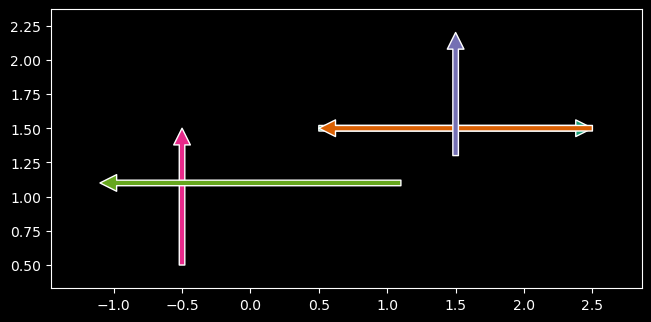

In [41]:
render_trials()